# Trying to Predict Freight Using BDI

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/coalfreightbdi.csv")
freight = data[['Date','BDI','Freight']]
freight = freight.dropna()
print(freight.shape)
freightnew = np.array(freight)
freightnew = pd.DataFrame(freightnew)
freightnew.columns = ['Date','BDI','Freight']
freightnew

(1006, 3)


,Date,BDI,Freight
0,1/5/1996,1583,4.15
1,1/12/1996,1550,4.55
2,1/19/1996,1538,4.55
3,1/26/1996,1529,4.55
4,2/2/1996,1484,4.6
5,2/9/1996,1453,4.6
6,2/16/1996,1437,4.15
7,2/23/1996,1400,4.25
8,3/1/1996,1357,4.35
9,3/8/1996,1350,5.5


In [3]:
freight.describe()

,BDI,Freight
count,1006.000000,1006.000000
mean,2391.473161,13.362117
std,2063.566624,10.457040
min,513.000000,3.500000
25%,1049.000000,6.500000
50%,1514.000000,10.450000
75%,2904.750000,16.225000
max,11612.000000,73.350000


In [4]:
freight.corr() #nice correlation

,BDI,Freight
BDI,1.00000,0.95391
Freight,0.95391,1.00000


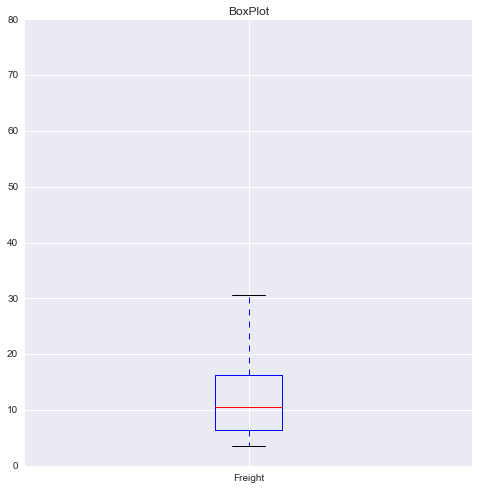

In [6]:
plt.show(freightnew['Freight'].plot(kind='box',figsize=(8,8),title=('BoxPlot'))) 
#both freight and BDI had no apparent outliers

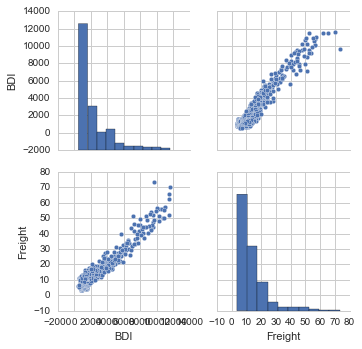

In [7]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freight, size=2.5);
plt.show()
#freight and BDI positively skewed

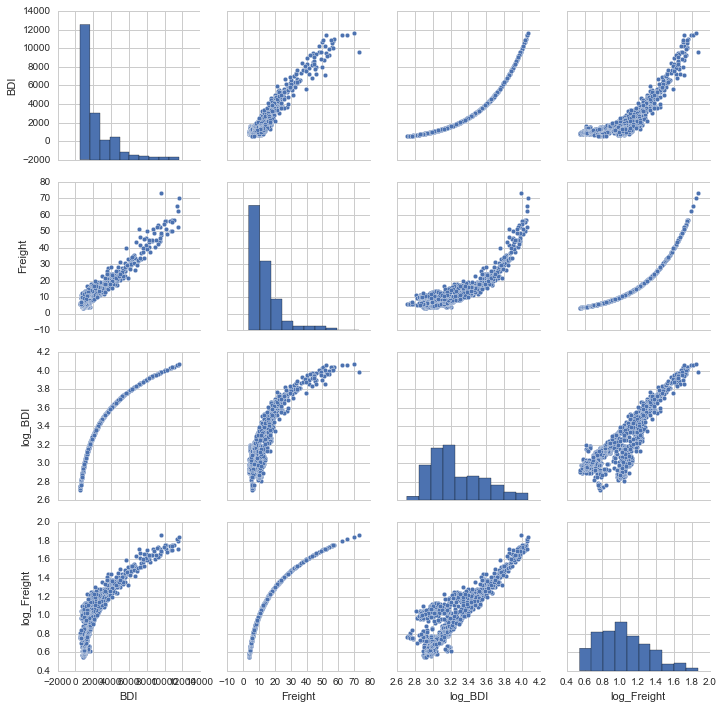

In [25]:
freightmore = data[['Date','BDI','Freight','log_BDI','log_Freight']]
freightmore = freightmore.dropna()
sns.set(style='whitegrid', context='notebook')
sns.pairplot(freightmore, size=2.5);
plt.show()

In [26]:
from datetime import datetime
freightnew['Date'] = pd.to_datetime(freightnew['Date'])
date = freightnew['Date']
freightnew.dtypes

Date       datetime64[ns]
BDI                object
Freight            object
dtype: object

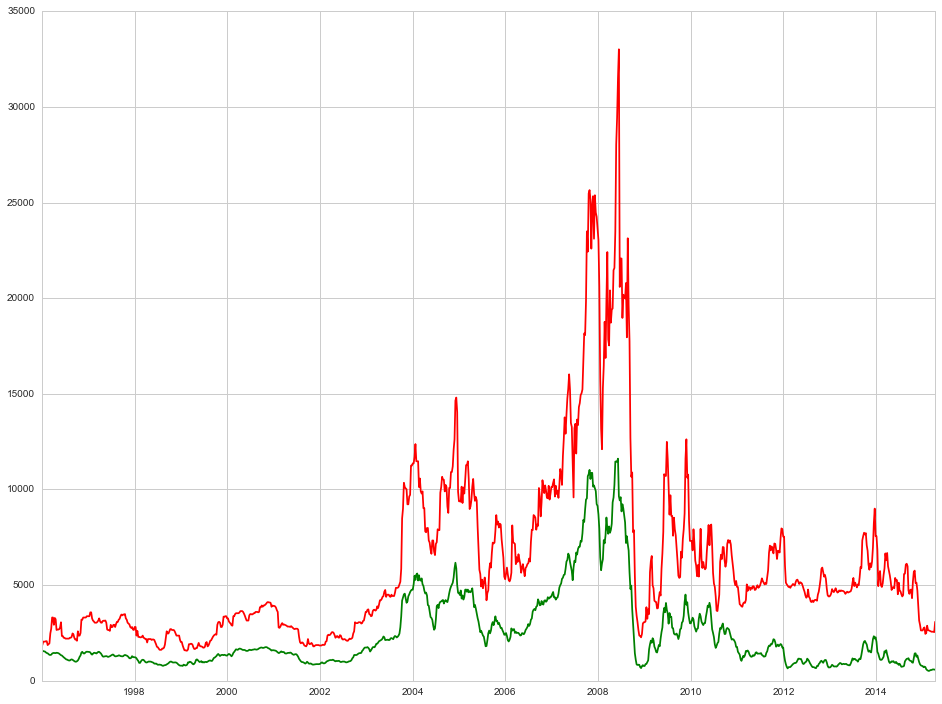

In [14]:
#trend
x = date
y1 = (freightnew['BDI'])
y2 = (freightnew['Freight'])*450

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.show()

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with intercept on BDI to predict freight
X = freight[['BDI']]
Y = freight[['Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.014e+04
Date:                Wed, 23 Mar 2016   Prob (F-statistic):               0.00
Time:                        12:50:33   Log-Likelihood:                -2577.4
No. Observations:                1006   AIC:                             5159.
Df Residuals:                    1004   BIC:                             5169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8020      0.152     11.889      0.000         1.505     2.099
BDI            0.0048    4.8e-05    100.721      0.000         0.005     0.005
==============================================================================
Omnibus:                      266.494   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.216
Skew:                           1.249   Prob(JB):                    6.84e-205
Kurtosis:                       7.024   Cond. No.                     4.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


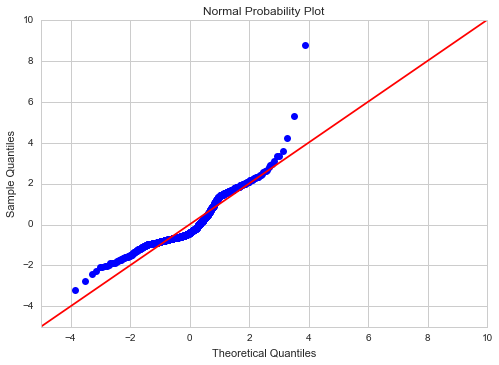

In [17]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = freightmore[['log_BDI']]
Y = freightmore[['log_Freight']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_Freight   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3173.
Date:                Thu, 24 Mar 2016   Prob (F-statistic):          4.48e-313
Time:                        07:12:26   Log-Likelihood:                 577.70
No. Observations:                1006   AIC:                            -1151.
Df Residuals:                    1004   BIC:                            -1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.6323      0.047    -34.408      0.000        -1.725    -1.539
log_BDI        0.8154      0.014     56.330      0.000         0.787     0.844
==============================================================================
Omnibus:                       51.965   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.619
Skew:                           0.550   Prob(JB):                     8.36e-13
Kurtosis:                       2.658   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


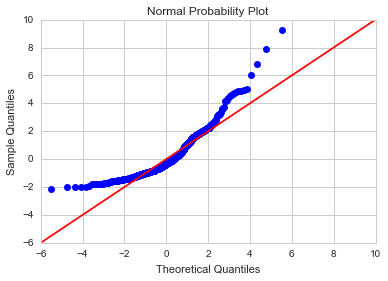

In [34]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### Using RDF Now

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X=freightnew[['BDI']].values
y=freightnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [46]:
#do multiple times to see what parameters are the best
rdf_model_freight = fit_predict_model(X_train,y_train)
print (rdf_model_freight.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [7]:
X=freightnew[['BDI']].values
y=freightnew['Freight'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 6.428, test: 10.387
R^2 train: 0.938, test: 0.915


### Summary of RDF model vs LR model

In [27]:
freight_predicted = forest.predict(X)
freight_predicted = pd.DataFrame(freight_predicted)
freight_predicted.columns = ['Predicted_Freight']
freightnew['Predicted_Freight'] = freight_predicted
rdf_error = (abs(freightnew['Predicted_Freight'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['RDF_Error'] = rdf_error
lr_predicted = 1.8020 + (freightnew['BDI']*0.0048)
freightnew['Predicted_Freight_LR'] = lr_predicted
lr_error = (abs(freightnew['Predicted_Freight_LR'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['LR_Error'] = lr_error
predicted_transform = 10**(-1.6323 + (freightmore['log_BDI']*0.8154))
freightnew['Predicted_Freight_Trans'] = predicted_transform
trans_error = (abs(freightnew['Predicted_Freight_Trans'] - freightnew['Freight'])/freightnew['Freight'])*100
freightnew['Trans_Error'] = trans_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average Trans error is: %.3f" % (trans_error.mean()))
freightnew

Average RDF error is: 23.280
Average LR error is: 25.140
Average Trans error is: 25.320


,Date,BDI,Freight,Predicted_Freight,RDF_Error,Predicted_Freight_LR,LR_Error,Predicted_Freight_Trans,Trans_Error
0,1996-01-05,1583,4.15,8.168751,96.8374,9.4004,126.516,9.474510,128.301
1,1996-01-12,1550,4.55,8.168751,79.533,9.242,103.121,9.313147,104.685
2,1996-01-19,1538,4.55,8.219574,80.65,9.1844,101.855,9.254313,103.391
3,1996-01-26,1529,4.55,8.226061,80.7926,9.1412,100.905,9.210132,102.42
4,1996-02-02,1484,4.6,8.225133,78.8072,8.9252,94.0261,8.988500,95.4022
5,1996-02-09,1453,4.6,7.979304,73.4631,8.7764,90.7913,8.835098,92.0674
6,1996-02-16,1437,4.15,8.006711,92.9328,8.6996,109.629,8.755687,110.98
7,1996-02-23,1400,4.25,7.932088,86.6374,8.522,100.518,8.571420,101.68
8,1996-03-01,1357,4.35,7.919537,82.0583,8.3156,91.1632,8.356138,92.0951
9,1996-03-08,1350,5.5,7.927192,44.1308,8.282,50.5818,8.320974,51.2904


In [14]:
from datetime import datetime
freightnew['Date'] = pd.to_datetime(freightnew['Date'])
date = freightnew['Date']

In [28]:
newpred2 = data [['Date','BDI','log_BDI']][1006:]
newpred = data [['BDI']][1006:]
newpred2

,Date,BDI,log_BDI
1006,4/17/2015,597,2.775974
1007,4/24/2015,600,2.778151
1008,5/1/2015,587,2.768638
1009,5/8/2015,574,2.758912
1010,5/15/2015,634,2.802089
1011,5/22/2015,586,2.767898
1012,5/29/2015,589,2.770115
1013,6/5/2015,610,2.785330
1014,6/12/2015,642,2.807535
1015,6/19/2015,779,2.891537


In [29]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','log_BDI']
lr_predictednew = 1.8020 + (newpred2['BDI']*0.0048)
newpred2['Predicted_Freight_LR'] = lr_predictednew
trans_predictednew = 10**(-1.6323 + (newpred2['log_BDI']*0.8154))
newpred2['Predicted_Freight_Trans'] = trans_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Freight'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,log_BDI,Predicted_Freight_LR,Predicted_Freight_Trans,Predicted_Freight
0,2015-04-17,597,2.77597,4.6676,4.27789,7.531709
1,2015-04-24,600,2.77815,4.682,4.29541,7.531709
2,2015-05-01,587,2.76864,4.6196,4.21937,7.531709
3,2015-05-08,574,2.75891,4.5572,4.14302,7.531709
4,2015-05-15,634,2.80209,4.8452,4.49287,8.095648
5,2015-05-22,586,2.7679,4.6148,4.21351,7.531709
6,2015-05-29,589,2.77012,4.6292,4.23109,7.531709
7,2015-06-05,610,2.78533,4.73,4.35369,7.531709
8,2015-06-12,642,2.80754,4.8836,4.53904,8.181401
9,2015-06-19,779,2.89154,5.5412,5.31447,7.320952


In [30]:
frames = [freightnew,newpred2]
combined = pd.concat(frames)
combined

,BDI,Date,Freight,LR_Error,Predicted_Freight,Predicted_Freight_LR,Predicted_Freight_Trans,RDF_Error,Trans_Error,log_BDI
0,1583,1996-01-05,4.15,126.516,8.168751,9.4004,9.47451,96.8374,128.301,NaN
1,1550,1996-01-12,4.55,103.121,8.168751,9.242,9.31315,79.533,104.685,NaN
2,1538,1996-01-19,4.55,101.855,8.219574,9.1844,9.25431,80.65,103.391,NaN
3,1529,1996-01-26,4.55,100.905,8.226061,9.1412,9.21013,80.7926,102.42,NaN
4,1484,1996-02-02,4.6,94.0261,8.225133,8.9252,8.9885,78.8072,95.4022,NaN
5,1453,1996-02-09,4.6,90.7913,7.979304,8.7764,8.8351,73.4631,92.0674,NaN
6,1437,1996-02-16,4.15,109.629,8.006711,8.6996,8.75569,92.9328,110.98,NaN
7,1400,1996-02-23,4.25,100.518,7.932088,8.522,8.57142,86.6374,101.68,NaN
8,1357,1996-03-01,4.35,91.1632,7.919537,8.3156,8.35614,82.0583,92.0951,NaN
9,1350,1996-03-08,5.5,50.5818,7.927192,8.282,8.32097,44.1308,51.2904,NaN


In [32]:
combined.to_csv("C:/Users/msteinme/Documents/freight.csv")

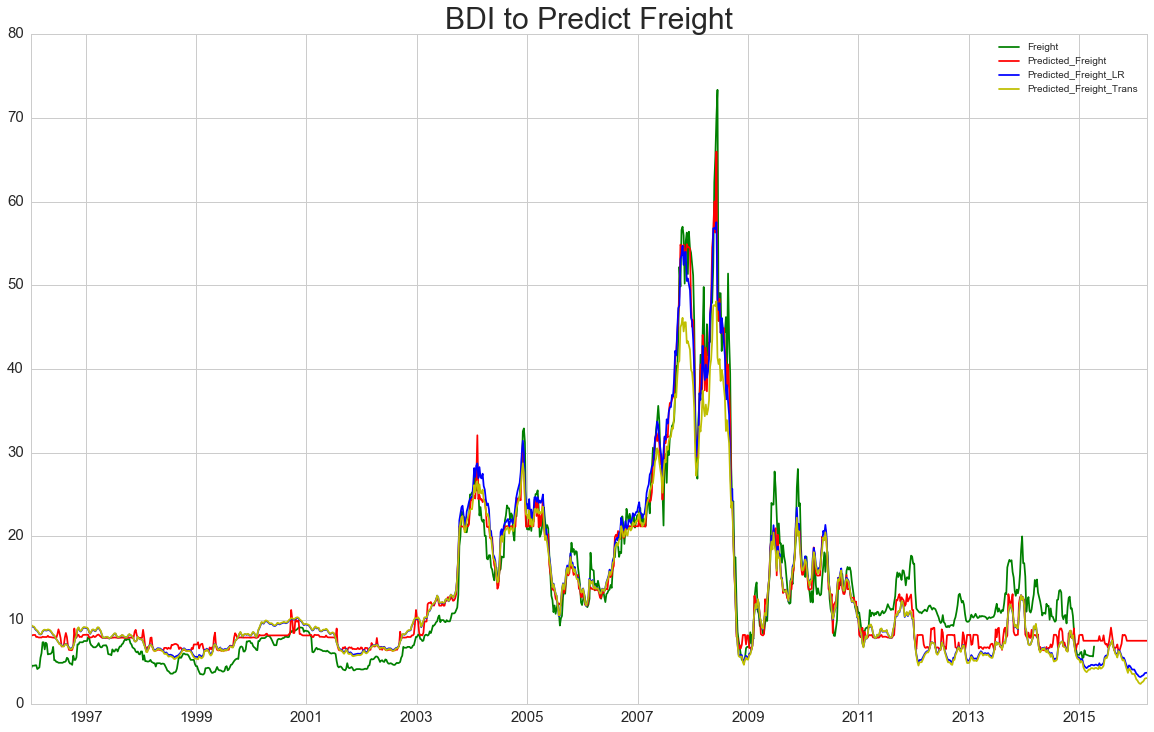

In [31]:
x = (combined['Date'])
y1 = (combined['Freight'])
y2 = (combined['Predicted_Freight'])
y3 = (combined['Predicted_Freight_LR'])
y4 = (combined['Predicted_Freight_Trans'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI to Predict Freight', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

# Use BDI to predict China Coal 

In [76]:
coal = data[['Date','BDI','Coal','log_BDI','log_Coal']]
coal = coal.dropna()
print(coal.shape)
coalnew = np.array(coal)
coalnew = pd.DataFrame(coalnew)
coalnew.columns = ['Date','BDI','Coal','log_BDI','log_Coal']
coalnew

(841, 5)


,Date,BDI,Coal,log_BDI,log_Coal
0,2/18/2000,1454,21.3,3.16256,1.32838
1,2/25/2000,1511,21.3,3.17926,1.32838
2,3/3/2000,1578,20.9,3.19811,1.32015
3,3/10/2000,1645,21,3.21617,1.32222
4,3/17/2000,1630,21,3.21219,1.32222
5,3/24/2000,1618,21,3.20898,1.32222
6,3/31/2000,1660,21,3.22011,1.32222
7,4/7/2000,1684,21.2,3.22634,1.32634
8,4/14/2000,1676,21.4,3.22427,1.33041
9,4/21/2000,1656,21.5,3.21906,1.33244


In [77]:
coal.describe()

,BDI,Coal,log_BDI,log_Coal
count,841.000000,841.000000,841.000000,841.000000
mean,2599.941736,66.176219,3.286980,1.762055
std,2200.341338,33.440450,0.329010,0.232774
min,291.000000,20.900000,2.463893,1.320146
25%,1037.000000,40.100000,3.015779,1.603144
50%,1740.000000,60.400000,3.240549,1.781037
75%,3379.000000,88.150000,3.528788,1.945222
max,11612.000000,192.500000,4.064907,2.284431


In [78]:
coal.corr()

,BDI,Coal,log_BDI,log_Coal
BDI,1.000000,0.256391,0.915917,0.233181
Coal,0.256391,1.000000,0.152026,0.960775
log_BDI,0.915917,0.152026,1.000000,0.134721
log_Coal,0.233181,0.960775,0.134721,1.000000


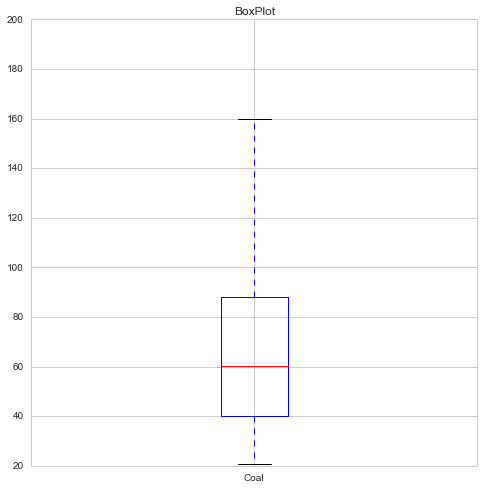

In [79]:
plt.show(coal['Coal'].plot(kind='box',figsize=(8,8),title=('BoxPlot'))) 
#both coal and BDI had no apparent outliers, but both have long tails

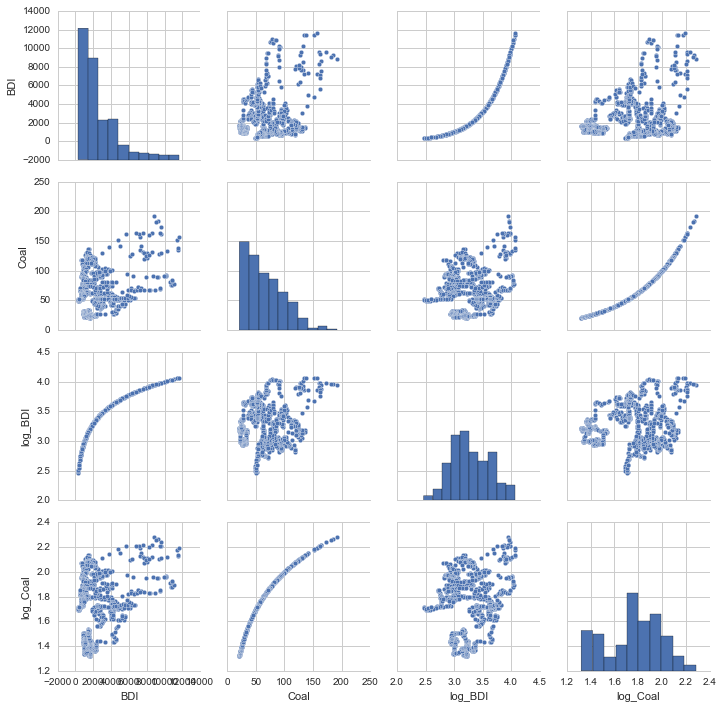

In [80]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(coal, size=2.5);
plt.show() #both have large positive skew so in excel I will take log10 to make more normal

In [81]:
from datetime import datetime
coalnew['Date'] = pd.to_datetime(coalnew['Date'])
date = coalnew['Date']
coalnew.dtypes

Date        datetime64[ns]
BDI                 object
Coal                object
log_BDI             object
log_Coal            object
dtype: object

In [87]:
coalnew

,Date,BDI,Coal,log_BDI,log_Coal
0,2000-02-18,1454,21.3,3.16256,1.32838
1,2000-02-25,1511,21.3,3.17926,1.32838
2,2000-03-03,1578,20.9,3.19811,1.32015
3,2000-03-10,1645,21,3.21617,1.32222
4,2000-03-17,1630,21,3.21219,1.32222
5,2000-03-24,1618,21,3.20898,1.32222
6,2000-03-31,1660,21,3.22011,1.32222
7,2000-04-07,1684,21.2,3.22634,1.32634
8,2000-04-14,1676,21.4,3.22427,1.33041
9,2000-04-21,1656,21.5,3.21906,1.33244


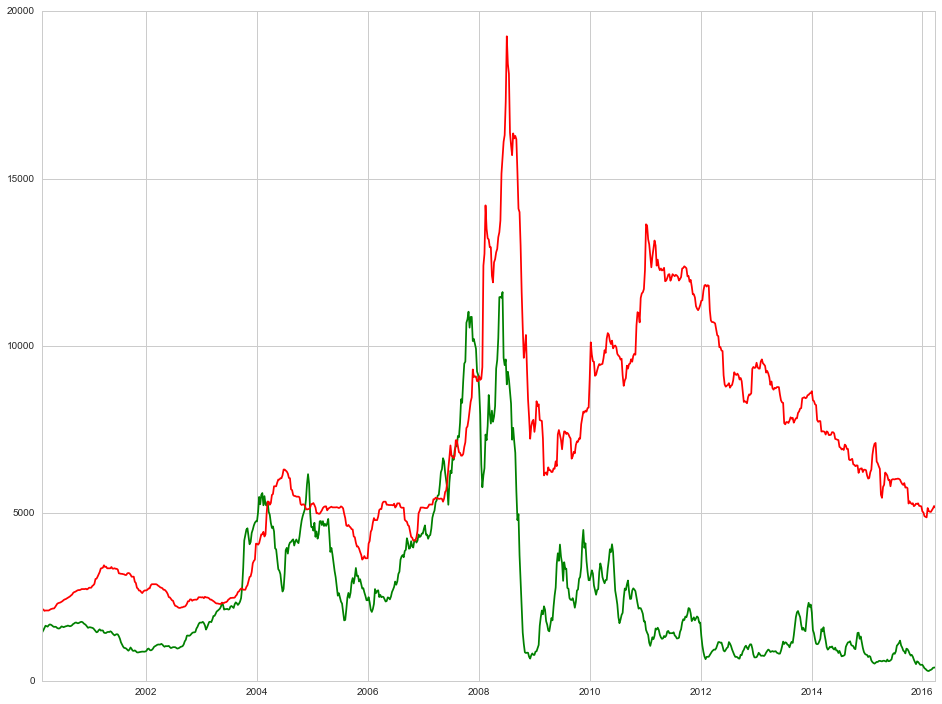

In [50]:
#trend, looks like BDI is leading coal
x = date
y1 = (coalnew['BDI'])
y2 = (coalnew['Coal'])*100

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.show()

In [82]:
#fit a OLS model with intercept on BDI to predict freight
#really bad R^2 so terrible model
X = coal[['BDI']]
Y = coal[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     59.03
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           4.32e-14
Time:                        09:12:19   Log-Likelihood:                -4115.9
No. Observations:                 841   AIC:                             8236.
Df Residuals:                     839   BIC:                             8245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         56.0453      1.727     32.453      0.000        52.656    59.435
BDI            0.0039      0.001      7.683      0.000         0.003     0.005
==============================================================================
Omnibus:                       72.908   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.184
Skew:                           0.594   Prob(JB):                     1.90e-14
Kurtosis:                       2.374   Cond. No.                     5.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


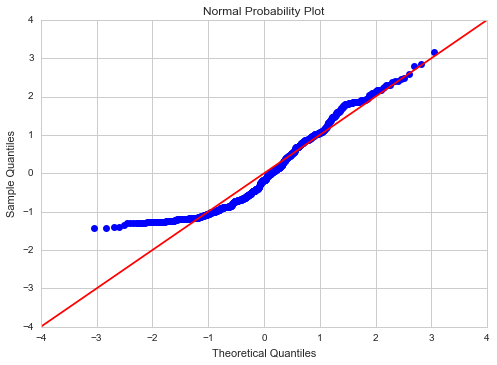

In [52]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()
#apparent skew

In [83]:
X = coalmore[['log_BDI']]
Y = coalmore[['log_Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#made the R^2 even worse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_Coal   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.51
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           8.89e-05
Time:                        09:12:31   Log-Likelihood:                 40.789
No. Observations:                 841   AIC:                            -77.58
Df Residuals:                     839   BIC:                            -68.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4488      0.080     18.120      0.000         1.292     1.606
log_BDI        0.0953      0.024      3.938      0.000         0.048     0.143
==============================================================================
Omnibus:                      225.638   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.845
Skew:                          -0.222   Prob(JB):                     1.83e-10
Kurtosis:                       1.960   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


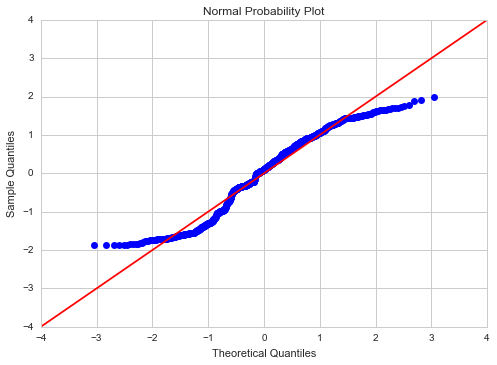

In [54]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot')
fig.show()

### Now using RDF model

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coalnew[['BDI']].values
y = coalnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [85]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [62]:
#do multiple times to see what parameters are the best
rdf_model_coal = fit_predict_model(X_train,y_train)
print (rdf_model_coal.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [86]:
X = coalnew[['BDI']].values
y = coalnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 558.809, test: 868.692
R^2 train: 0.514, test: 0.166


### RDF vs LR vs Transformed Model

In [88]:
coal_predicted = forest.predict(X)
coal_predicted = pd.DataFrame(coal_predicted)
coalnew['Predicted_Coal_RDF'] = coal_predicted
rdf_error = (abs(coalnew['Predicted_Coal_RDF'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['RDF_Error'] = rdf_error
lr_predicted = 56.0453 + (coalnew['BDI']*0.0039)
coalnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalnew['Predicted_Coal_LR'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['LR_Error'] = lr_error
predicted_transform = 10**(1.4488 + (coalnew['log_BDI']*0.0953))
coalnew['Predicted_Coal_Trans'] = predicted_transform
trans_error = (abs(coalnew['Predicted_Coal_Trans'] - coalnew['Coal'])/coalnew['Coal'])*100
coalnew['Trans_Error'] = trans_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average Trans error is: %.3f" % (trans_error.mean()))
coalnew

Average RDF error is: 40.066
Average LR error is: 56.119
Average Trans error is: 49.804


,Date,BDI,Coal,log_BDI,log_Coal,Predicted_Coal_RDF,RDF_Error,Predicted_Coal_LR,LR_Error,Predicted_Coal_Trans,Trans_Error
0,2000-02-18,1454,21.3,3.16256,1.32838,46.098338,116.424,61.7159,189.746,56.259,164.127
1,2000-02-25,1511,21.3,3.17926,1.32838,66.147093,210.55,61.9382,190.79,56.4656,165.097
2,2000-03-03,1578,20.9,3.19811,1.32015,37.604565,79.9261,62.1995,197.605,56.6995,171.29
3,2000-03-10,1645,21,3.21617,1.32222,44.260289,110.763,62.4608,197.432,56.9247,171.07
4,2000-03-17,1630,21,3.21219,1.32222,25.708649,22.4221,62.4023,197.154,56.875,170.833
5,2000-03-24,1618,21,3.20898,1.32222,25.642726,22.1082,62.3555,196.931,56.835,170.643
6,2000-03-31,1660,21,3.22011,1.32222,30.753675,46.4461,62.5193,197.711,56.9739,171.305
7,2000-04-07,1684,21.2,3.22634,1.32634,35.889896,69.292,62.6129,195.344,57.0519,169.113
8,2000-04-14,1676,21.4,3.22427,1.33041,41.489710,93.8772,62.5817,192.438,57.0261,166.477
9,2000-04-21,1656,21.5,3.21906,1.33244,30.731229,42.936,62.5037,190.715,56.9608,164.934


In [90]:
newpred2 = data [['Date','BDI','log_BDI']][0:215]
newpred = data [['BDI']][0:215]
newpred2.tail()

,Date,BDI,log_BDI
210,1/14/2000,1404,3.147367
211,1/21/2000,1384,3.141136
212,1/28/2000,1329,3.123525
213,2/4/2000,1280,3.107210
214,2/11/2000,1345,3.128722


In [91]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','log_BDI']
lr_predictednew = 56.0453 + (newpred2['BDI']*0.0039)
newpred2['Predicted_Coal_LR'] = lr_predictednew
trans_predictednew = 10**(1.4488 + (newpred2['log_BDI']*0.0953))
newpred2['Predicted_Coal_Trans'] = trans_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_Coal_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,log_BDI,Predicted_Coal_LR,Predicted_Coal_Trans,Predicted_Coal_RDF
0,1996-01-05,1583,3.19948,62.219,56.7166,36.439219
1,1996-01-12,1550,3.19033,62.0903,56.6029,61.145967
2,1996-01-19,1538,3.18696,62.0435,56.561,64.461062
3,1996-01-26,1529,3.18441,62.0084,56.5294,83.401402
4,1996-02-02,1484,3.17143,61.8329,56.3687,71.722297
5,1996-02-09,1453,3.16227,61.712,56.2554,46.098338
6,1996-02-16,1437,3.15746,61.6496,56.196,58.580804
7,1996-02-23,1400,3.14613,61.5053,56.0565,52.665997
8,1996-03-01,1357,3.13258,61.3376,55.8901,57.258321
9,1996-03-08,1350,3.13033,61.3103,55.8626,80.353001


In [93]:
frames = [newpred2,coalnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,LR_Error,Predicted_Coal_LR,Predicted_Coal_RDF,Predicted_Coal_Trans,RDF_Error,Trans_Error,log_BDI,log_Coal
0,1583,NaN,1996-01-05,NaN,62.219,36.439219,56.7166,NaN,NaN,3.19948,NaN
1,1550,NaN,1996-01-12,NaN,62.0903,61.145967,56.6029,NaN,NaN,3.19033,NaN
2,1538,NaN,1996-01-19,NaN,62.0435,64.461062,56.561,NaN,NaN,3.18696,NaN
3,1529,NaN,1996-01-26,NaN,62.0084,83.401402,56.5294,NaN,NaN,3.18441,NaN
4,1484,NaN,1996-02-02,NaN,61.8329,71.722297,56.3687,NaN,NaN,3.17143,NaN
5,1453,NaN,1996-02-09,NaN,61.712,46.098338,56.2554,NaN,NaN,3.16227,NaN
6,1437,NaN,1996-02-16,NaN,61.6496,58.580804,56.196,NaN,NaN,3.15746,NaN
7,1400,NaN,1996-02-23,NaN,61.5053,52.665997,56.0565,NaN,NaN,3.14613,NaN
8,1357,NaN,1996-03-01,NaN,61.3376,57.258321,55.8901,NaN,NaN,3.13258,NaN
9,1350,NaN,1996-03-08,NaN,61.3103,80.353001,55.8626,NaN,NaN,3.13033,NaN


In [94]:
combined.to_csv("C:/Users/msteinme/Documents/coal2.csv")

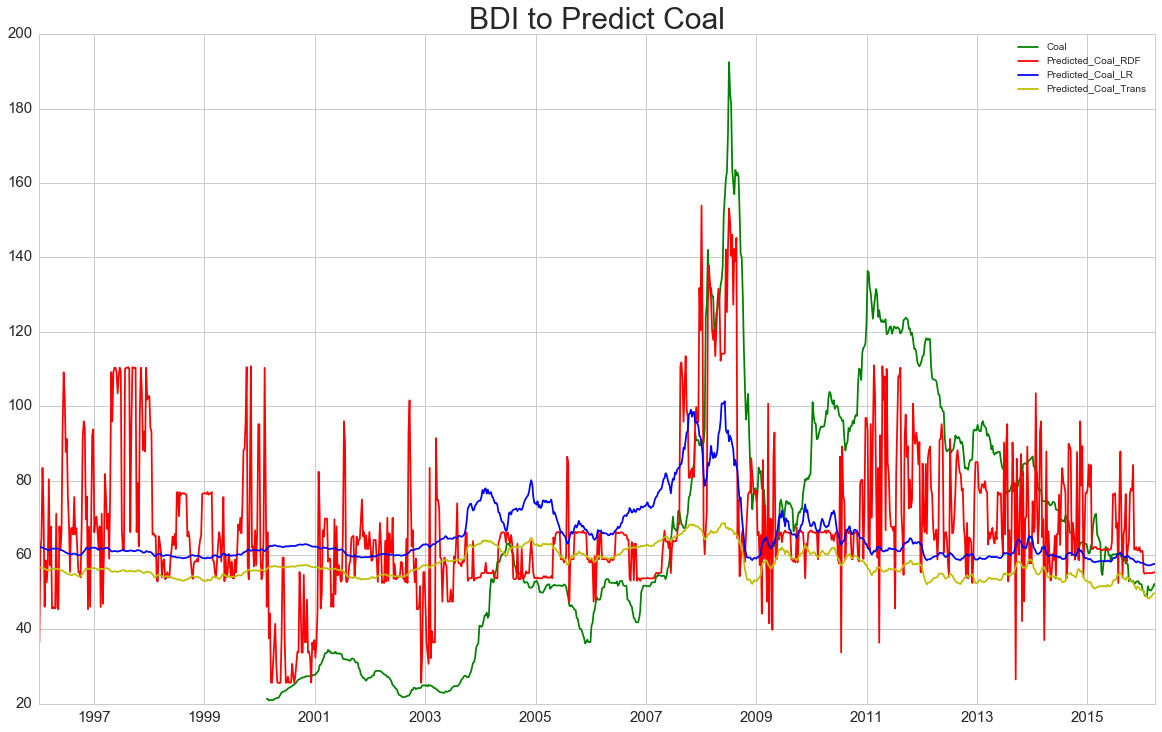

In [95]:
#can clearly see that BDI isn't very good at predicting coal values
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_Coal_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_Trans'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

# BDI leading coal by x days

In [123]:
coallead = data[['Date','Coal','BDI_Lead']]
coallead = coallead.dropna()
print(coallead.shape)
coalleadnew = np.array(coallead)
coalleadnew = pd.DataFrame(coalleadnew)
coalleadnew.columns = ['Date','Coal','BDI_Lead']
coalleadnew

(841, 3)


,Date,Coal,BDI_Lead
0,2/18/2000,21.3,1404
1,2/25/2000,21.3,1351
2,3/3/2000,20.9,1296
3,3/10/2000,21,1335
4,3/17/2000,21,1354
5,3/24/2000,21,1355
6,3/31/2000,21,1341
7,4/7/2000,21.2,1360
8,4/14/2000,21.4,1343
9,4/21/2000,21.5,1319


In [118]:
coallead.corr()

,Coal,BDI_Lead
Coal,1.000000,0.389071
BDI_Lead,0.389071,1.000000


In [124]:
from datetime import datetime
coalleadnew['Date'] = pd.to_datetime(coalleadnew['Date'])
date = coalleadnew['Date']
coalleadnew.dtypes

Date        datetime64[ns]
Coal                object
BDI_Lead            object
dtype: object

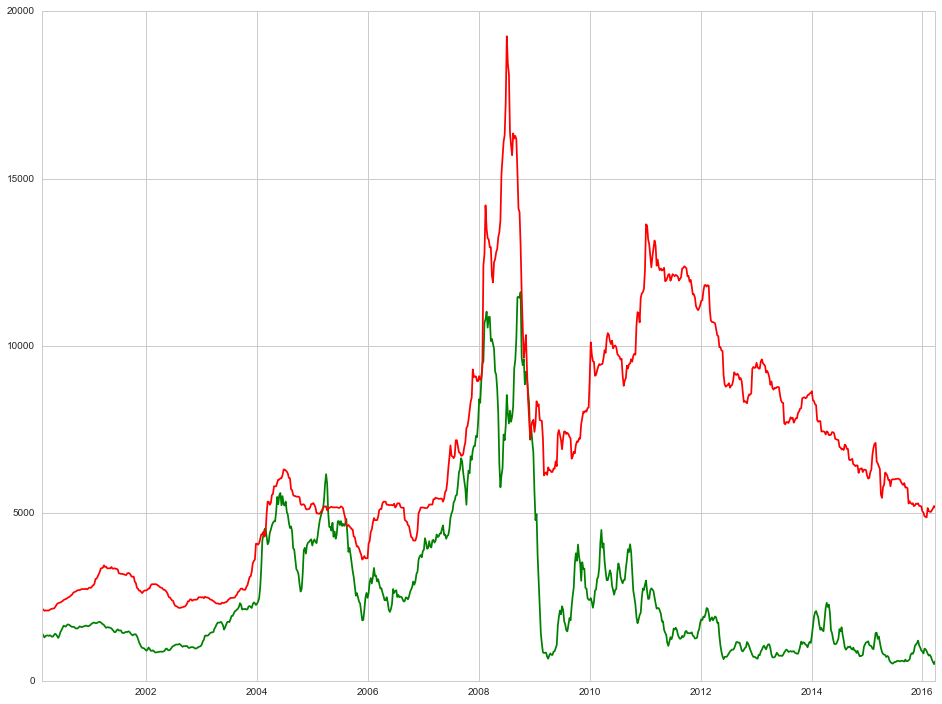

In [120]:
x = date
y1 = (coalleadnew['BDI_Lead'])
y2 = (coalleadnew['Coal'])*100

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.show()

In [121]:
#still not good
X = coallead[['BDI_Lead']]
Y = coallead[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     149.7
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           8.77e-32
Time:                        10:00:22   Log-Likelihood:                -4075.5
No. Observations:                 841   AIC:                             8155.
Df Residuals:                     839   BIC:                             8165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         50.5811      1.660     30.475      0.000        47.323    53.839
BDI_Lead       0.0060      0.000     12.234      0.000         0.005     0.007
==============================================================================
Omnibus:                       89.947   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.116
Skew:                           0.626   Prob(JB):                     2.19e-16
Kurtosis:                       2.300   Cond. No.                     5.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
lr_predicted = 50.5811 + (coalleadnew['BDI_Lead']*0.0060)
coalleadnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalleadnew['Predicted_Coal_LR'] - coalleadnew['Coal'])/coalleadnew['Coal'])*100
coalleadnew['LR_Error'] = lr_error
print("Average LR error is: %.3f" % (lr_error.mean()))
coalleadnew
#bad so not going any further in investigating this model

Average LR error is: 53.717


,Date,Coal,BDI_Lead,Predicted_Coal_LR,LR_Error
0,2000-02-18,21.3,1404,59.0051,177.019
1,2000-02-25,21.3,1351,58.6871,175.526
2,2000-03-03,20.9,1296,58.3571,179.221
3,2000-03-10,21,1335,58.5911,179.005
4,2000-03-17,21,1354,58.7051,179.548
5,2000-03-24,21,1355,58.7111,179.577
6,2000-03-31,21,1341,58.6271,179.177
7,2000-04-07,21.2,1360,58.7411,177.081
8,2000-04-14,21.4,1343,58.6391,174.014
9,2000-04-21,21.5,1319,58.4951,172.07


# BDI and freight to predict coal 

In [127]:
coalall = data[['Date','BDI','Coal','Freight']]
coalall = coalall.dropna()
print(coalall.shape)
coalallnew = np.array(coalall)
coalallnew = pd.DataFrame(coalallnew)
coalallnew.columns = ['Date','BDI','Coal','Freight']
coalallnew

(791, 4)


,Date,BDI,Coal,Freight
0,2/18/2000,1454,21.3,7.5
1,2/25/2000,1511,21.3,7.5
2,3/3/2000,1578,20.9,7.75
3,3/10/2000,1645,21,7.85
4,3/17/2000,1630,21,7.85
5,3/24/2000,1618,21,7.85
6,3/31/2000,1660,21,7.85
7,4/7/2000,1684,21.2,7.95
8,4/14/2000,1676,21.4,8.1
9,4/21/2000,1656,21.5,8.1


In [42]:
coalall.corr()

,BDI,Coal,Freight
BDI,1.000000,0.245014,0.952179
Coal,0.245014,1.000000,0.411525
Freight,0.952179,0.411525,1.000000


In [ ]:
#since BDI and freight are highly correlated to each other in LR model using Freight as x variable since higher
#correlation to coal, however I will use both in RDF model

In [128]:
from datetime import datetime
coalallnew['Date'] = pd.to_datetime(coalallnew['Date'])
date = coalallnew['Date']
coalallnew.dtypes

Date       datetime64[ns]
BDI                object
Coal               object
Freight            object
dtype: object

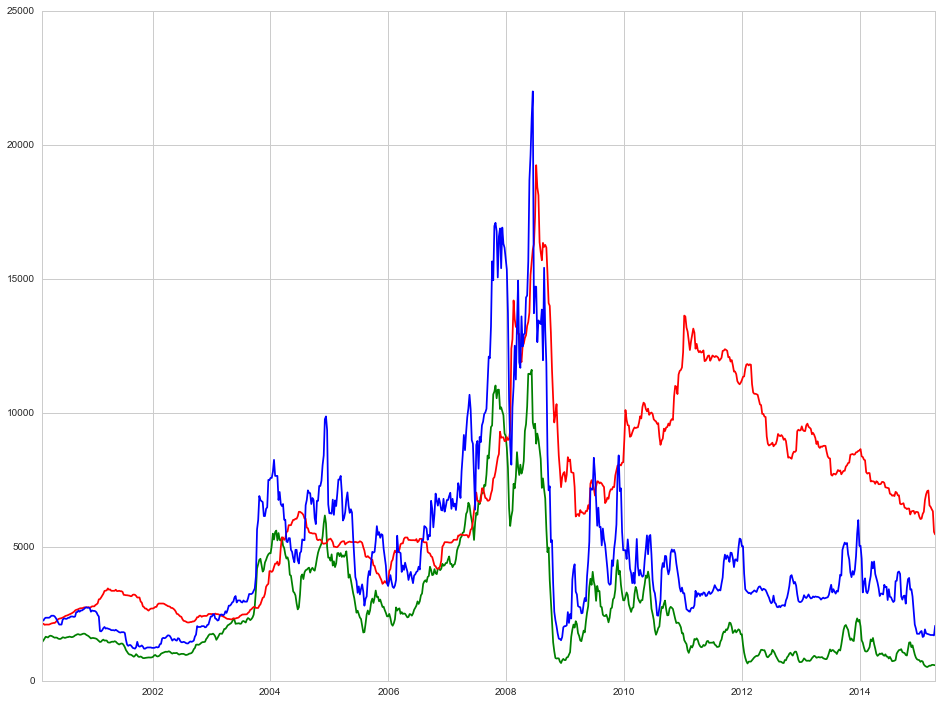

In [131]:
x = date
y1 = (coalallnew['BDI'])
y2 = (coalallnew['Coal'])*100
y3 = (coalallnew['Freight'])*300

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,y3,'b')
plt.show()

In [132]:
X = coalall[['BDI','Freight']]
Y = coalall[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     263.0
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           3.22e-88
Time:                        10:16:56   Log-Likelihood:                -3717.2
No. Observations:                 791   AIC:                             7440.
Df Residuals:                     788   BIC:                             7454.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9183      1.695     23.550      0.000        36.591    43.246
BDI           -0.0244      0.001    -17.420      0.000        -0.027    -0.022
Freight        6.0417      0.286     21.145      0.000         5.481     6.603
==============================================================================
Omnibus:                       87.641   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.946
Skew:                           0.890   Prob(JB):                     1.10e-25
Kurtosis:                       3.566   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
X = coalall[['Freight']]
Y = coalall[['Coal']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Coal   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 24 Mar 2016   Prob (F-statistic):           1.11e-33
Time:                        10:19:08   Log-Likelihood:                -3846.0
No. Observations:                 791   AIC:                             7696.
Df Residuals:                     789   BIC:                             7705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.7040      1.940     24.071      0.000        42.895    50.513
Freight        1.3023      0.103     12.683      0.000         1.101     1.504
==============================================================================
Omnibus:                      113.805   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.690
Skew:                           0.575   Prob(JB):                     3.30e-15
Kurtosis:                       2.164   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = coalallnew[['BDI','Freight']].values
y = coalallnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [137]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [143]:
rdf_model_coalall = fit_predict_model(X_train,y_train)
print (rdf_model_coalall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (100, 125, 150, 175, 200), 'max_depth': (5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [146]:
X = coalallnew[['BDI','Freight']].values
y = coalallnew['Coal'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 197.601, test: 327.994
R^2 train: 0.831, test: 0.725
[ 0.40543452  0.59456548]


In [148]:
coal_predicted = forest.predict(X)
coal_predicted = pd.DataFrame(coal_predicted)
coalallnew['Predicted_CoalAll_RDF'] = coal_predicted
rdf_error = (abs(coalallnew['Predicted_CoalAll_RDF'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['RDF_Error'] = rdf_error
mlr_predicted = 39.183 - (coalallnew['BDI']*0.0244) + (coalallnew['Freight']*6.0417)
coalallnew['Predicted_Coal_MLR'] = mlr_predicted
mlr_error = (abs(coalallnew['Predicted_Coal_MLR'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['MLR_Error'] = mlr_error
lr_predicted = 46.7040 + (coalallnew['Freight']*1.3023)
coalallnew['Predicted_Coal_LR'] = lr_predicted
lr_error = (abs(coalallnew['Predicted_Coal_LR'] - coalallnew['Coal'])/coalallnew['Coal'])*100
coalallnew['LR_Error'] = lr_error

print("Average RDF error is: %.3f" % (rdf_error.mean())) #this model looks worse than 
print("Average LR error is: %.3f" % (lr_error.mean()))
print("Average MLR error is: %.3f" % (mlr_error.mean()))
coalallnew

Average RDF error is: 17.652
Average LR error is: 54.217
Average MLR error is: 38.846


,Date,BDI,Coal,Freight,Predicted_CoalAll_RDF,RDF_Error,Predicted_Coal_MLR,MLR_Error,Predicted_Coal_LR,LR_Error
0,2000-02-18,1454,21.3,7.5,35.381955,66.1125,49.0181,130.132,56.4712,165.123
1,2000-02-25,1511,21.3,7.5,29.583807,38.8911,47.6273,123.603,56.4712,165.123
2,2000-03-03,1578,20.9,7.75,26.582018,27.1867,47.503,127.287,56.7968,171.755
3,2000-03-10,1645,21,7.85,31.669234,50.8059,46.4723,121.297,56.9271,171.081
4,2000-03-17,1630,21,7.85,22.713675,8.16036,46.8383,123.04,56.9271,171.081
5,2000-03-24,1618,21,7.85,22.499421,7.1401,47.1311,124.434,56.9271,171.081
6,2000-03-31,1660,21,7.85,23.555337,12.1683,46.1063,119.554,56.9271,171.081
7,2000-04-07,1684,21.2,7.95,24.102712,13.692,46.1249,117.57,57.0573,169.138
8,2000-04-14,1676,21.4,8.1,26.479772,23.7373,47.2264,120.684,57.2526,167.536
9,2000-04-21,1656,21.5,8.1,26.136580,21.5655,47.7144,121.927,57.2526,166.291


In [149]:
newpred2 = data [['Date','BDI','Freight']][0:215]
newpred = data [['BDI','Freight']][0:215]
newpred2.tail()

,Date,BDI,Freight
210,1/14/2000,1404,6.90
211,1/21/2000,1384,6.75
212,1/28/2000,1329,6.65
213,2/4/2000,1280,6.45
214,2/11/2000,1345,6.40


In [150]:
#new predictions
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date', 'BDI','Freight']
lr_predictednew =  46.7040 + (newpred2['Freight']*1.3023)
newpred2['Predicted_Coal_LR'] = lr_predictednew
mlr_predictednew = 39.183 - (newpred2['BDI']*0.0244) + (newpred2['Freight']*6.0417)
newpred2['Predicted_Coal_MLR'] = mlr_predictednew
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted_CoalAll_RDF'] = df_new_pred
newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

,Date,BDI,Freight,Predicted_Coal_LR,Predicted_Coal_MLR,Predicted_CoalAll_RDF
0,1996-01-05,1583,4.15,52.1085,25.6309,27.920659
1,1996-01-12,1550,4.55,52.6295,28.8527,28.021473
2,1996-01-19,1538,4.55,52.6295,29.1455,28.513564
3,1996-01-26,1529,4.55,52.6295,29.3651,28.699371
4,1996-02-02,1484,4.6,52.6946,30.7652,28.921025
5,1996-02-09,1453,4.6,52.6946,31.5216,28.836267
6,1996-02-16,1437,4.15,52.1085,29.1933,29.041840
7,1996-02-23,1400,4.25,52.2388,30.7002,29.033847
8,1996-03-01,1357,4.35,52.369,32.3536,28.547701
9,1996-03-08,1350,5.5,53.8666,39.4723,27.517490


In [151]:
frames = [newpred2,coalallnew]
combined = pd.concat(frames)
combined

,BDI,Coal,Date,Freight,LR_Error,MLR_Error,Predicted_CoalAll_RDF,Predicted_Coal_LR,Predicted_Coal_MLR,RDF_Error
0,1583,NaN,1996-01-05,4.15,NaN,NaN,27.920659,52.1085,25.6309,NaN
1,1550,NaN,1996-01-12,4.55,NaN,NaN,28.021473,52.6295,28.8527,NaN
2,1538,NaN,1996-01-19,4.55,NaN,NaN,28.513564,52.6295,29.1455,NaN
3,1529,NaN,1996-01-26,4.55,NaN,NaN,28.699371,52.6295,29.3651,NaN
4,1484,NaN,1996-02-02,4.6,NaN,NaN,28.921025,52.6946,30.7652,NaN
5,1453,NaN,1996-02-09,4.6,NaN,NaN,28.836267,52.6946,31.5216,NaN
6,1437,NaN,1996-02-16,4.15,NaN,NaN,29.041840,52.1085,29.1933,NaN
7,1400,NaN,1996-02-23,4.25,NaN,NaN,29.033847,52.2388,30.7002,NaN
8,1357,NaN,1996-03-01,4.35,NaN,NaN,28.547701,52.369,32.3536,NaN
9,1350,NaN,1996-03-08,5.5,NaN,NaN,27.517490,53.8666,39.4723,NaN


In [152]:
combined.to_csv("C:/Users/msteinme/Documents/coalall.csv")

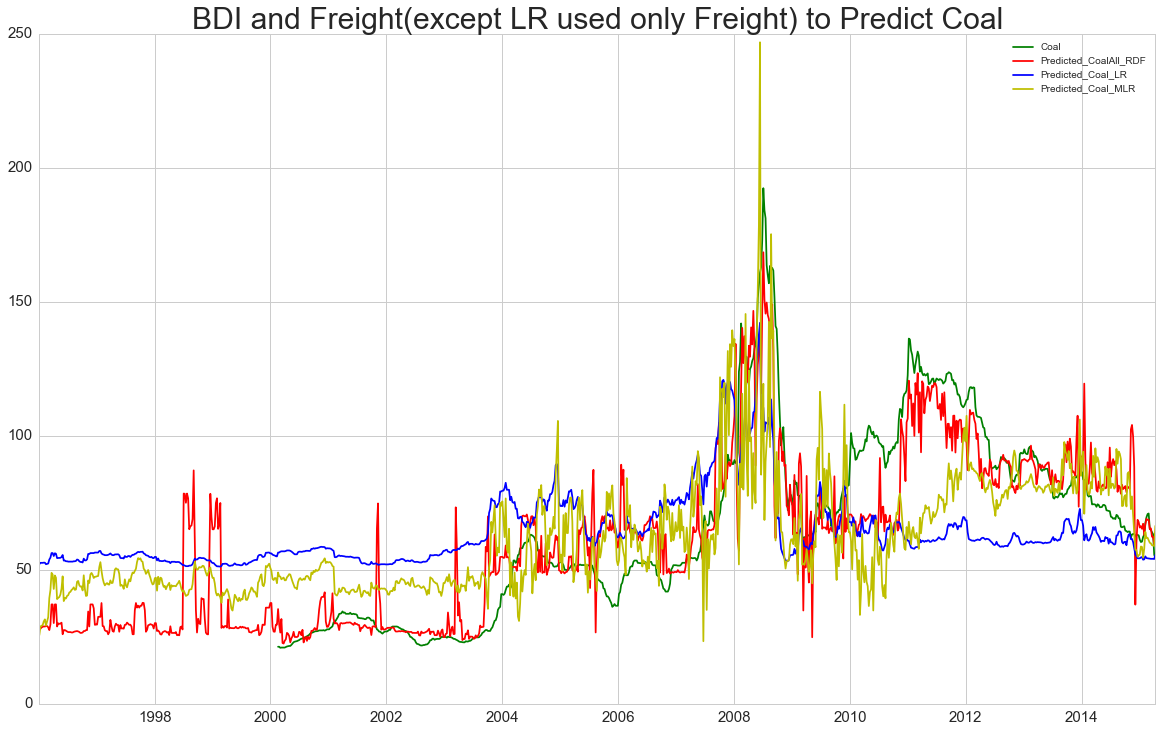

In [153]:
x = (combined['Date'])
y1 = (combined['Coal'])
y2 = (combined['Predicted_CoalAll_RDF'])
y3 = (combined['Predicted_Coal_LR'])
y4 = (combined['Predicted_Coal_MLR'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,y3,'b')
ax.plot(x,y4,'y')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('BDI and Freight(except LR used only Freight) to Predict Coal', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()